<a href="https://colab.research.google.com/github/Gabriel-dev576/Estad-stica-I-informe-II/blob/main/Estadisticaphyton2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files # Para cargar archivos en google colab
import io
from google.colab import files
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

In [6]:
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [8]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [9]:
tabla1 = tabla[["EDAD_MADRE" , "IDHEMOCLAS" , "IDFACTORRH"]]
tabla1.head(4)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,5,1,1
11,6,1,1
11,5,3,1
11,5,3,1


In [29]:
df2= tabla1[(tabla.EDAD_MADRE < 99) & (tabla1["IDHEMOCLAS"] !=9 ) &   (tabla1.IDFACTORRH != 9)  ]
df2.head(4)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,5,1,1
11,6,1,1
11,5,3,1
11,5,3,1


In [ ]:
#diagrama de barras edad de la madre

In [21]:
df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)
df2.EDAD_MADRE.head(2)
df2.EDAD_MADRE.head(2)

/tmp/ipython-input-3234606577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)


,EDAD_MADRE
COD_DPTO,
23,5
11,6


In [12]:
df2.loc[(df2.EDAD_MADRE == "1" ), "EDAD_MADRE"] , df2.loc[(df2.EDAD_MADRE == "2" ), "EDAD_MADRE"],df2.loc[(df2.EDAD_MADRE == "3" ), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "4" ), "EDAD_MADRE"] = "10-14", "15-19" , "20-34" , "25-29"
df2.loc[(df2.EDAD_MADRE == "5" ), "EDAD_MADRE"]  , df2.loc[(df2.EDAD_MADRE == "6" ), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "7" ), "EDAD_MADRE"] , df2.loc[(df2.EDAD_MADRE == "8" ), "EDAD_MADRE"] =  "30-34" ,"35-39" , "40-44", "45-49"
df2.loc[(df2.EDAD_MADRE == "9" ), "EDAD_MADRE"] , df2.loc[(df2.EDAD_MADRE == "99" ), "EDAD_MADRE"] = "50-55" , "NA"

<BarContainer object of 9 artists>

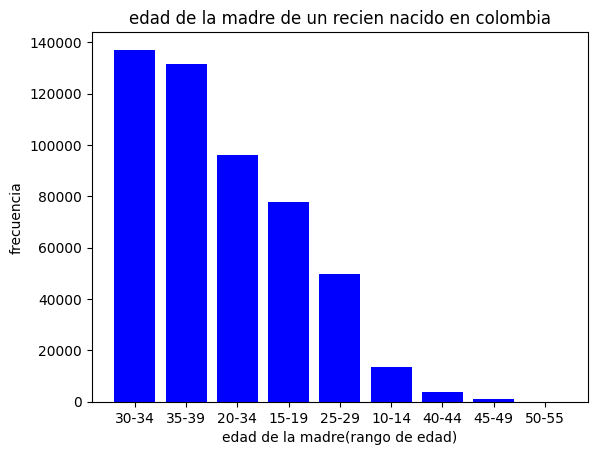

In [13]:
plt.title('edad de la madre de un recien nacido en colombia')
ax = plt.subplot()
ax.set_xlabel('edad de la madre(rango de edad)')
ax.set_ylabel('frecuencia')
x_values = df2.EDAD_MADRE.unique()
y_values= df2.EDAD_MADRE.value_counts().tolist()
plt.bar(x_values , y_values , color = "blue"  )

In [14]:
sizes = np.array(y_values)
sizes

array([137164, 131625,  96094,  77699,  49789,  13534,   3778,    923,
           46])

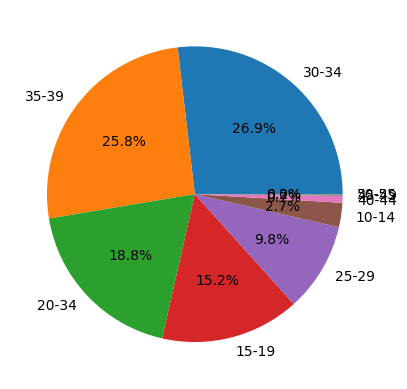

In [15]:
plt.pie(y_values, labels=x_values , autopct = '%1.1f%%')
plt.show()

In [16]:
len(df2.EDAD_MADRE)

510652

In [17]:
porcentaje =  [(x/len(df2.EDAD_MADRE)*100) for x in y_values]
print(x_values)
print(porcentaje)

['30-34' '35-39' '20-34' '15-19' '25-29' '10-14' '40-44' '45-49' '50-55']
[26.86056257490424, 25.775870847465594, 18.817903386259136, 15.215645880168882, 9.750084206073803, 2.650337215951372, 0.7398384810007599, 0.18074931656000562, 0.009008091616208299]


In [31]:
tabla_cont = pd.crosstab(df2.IDHEMOCLAS , df2["IDFACTORRH"])
tabla_cont

IDFACTORRH,negativo,positivo
IDHEMOCLAS,,
A,6358,121758
AB,417,8465
B,2219,45069
O,14746,311620


In [30]:
df2.loc[(df2.IDHEMOCLAS == 1 ), "IDHEMOCLAS"] , df2.loc[(df2.IDHEMOCLAS == 2 ), "IDHEMOCLAS"],df2.loc[(df2.IDHEMOCLAS == 3 ), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 4 ), "IDHEMOCLAS"] = "A", "B" , "O" , "AB"
df2.loc[(df2.IDFACTORRH == 1 ), "IDFACTORRH"]  , df2.loc[(df2.IDFACTORRH == 2 ), "IDFACTORRH"] =  "positivo" , "negativo"
df2.IDHEMOCLAS ,  df2.IDFACTORRH = df2.IDHEMOCLAS.astype(str) , df2.IDFACTORRH.astype(str)
df2.head(3)

/tmp/ipython-input-2989733724.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.IDHEMOCLAS == 1 ), "IDHEMOCLAS"] , df2.loc[(df2.IDHEMOCLAS == 2 ), "IDHEMOCLAS"],df2.loc[(df2.IDHEMOCLAS == 3 ), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 4 ), "IDHEMOCLAS"] = "A", "B" , "O" , "AB"
/tmp/ipython-input-2989733724.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'positivo' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.IDFACTORRH == 1 ), "IDFACTORRH"]  , df2.loc[(df2.IDFACTORRH == 2 ), "IDFACTORRH"] =  "positivo" , "negativo"
/tmp/ipython-input-2989733724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,5,A,positivo
11,6,A,positivo
11,5,O,positivo


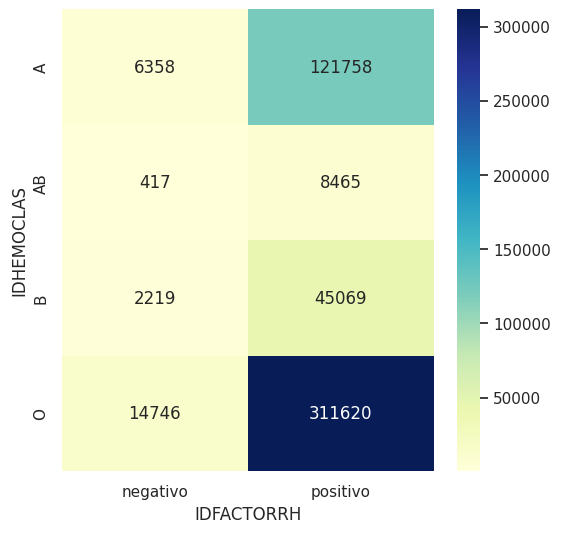

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True , fmt='d', cmap='YlGnBu' , cbar= True )
plt.show()

In [43]:
res = stats.chi2_contingency(tabla_cont)
chi , valor_p, _ ,_=res
print ( f" el valor de la estadistica chi cuadrado {chi} y el valor p es d {valor_p}")

 el valor de la estadistica chi cuadrado 41.272316570796086 y el valor p es d 5.724851648190839e-09


In [46]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.IDFACTORRH)))
coeficiente_phi = math.sqrt(chi/len(df2.IDFACTORRH))
coeficiente_v_de_cramer = math.sqrt(chi/(len(df2.IDFACTORRH)*min(4-1,2-1)))
print(f"los coeficientes de contingencia , phi y v de cramer estan respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y  {coeficiente_v_de_cramer}")

los coeficientes de contingencia , phi y v de cramer estan respectivamente dados por 0.008989786023325263, 0.008990149305754447 y  0.008990149305754447
